## Data Introduction

Dataset emails berisi informasi terkait dari 5172 file email yang dipilih secara acak dan labelnya masing-masing untuk klasifikasi spam atau bukan-spam.

Terdapat 3002 kolom pada dataset. 
Kolom pertama menunjukkan nama Email. 
Nama telah diatur dengan angka dan bukan nama penerima untuk melindungi privasi. 
Kolom terakhir diberi label untuk prediksi : 1 untuk spam, 0 untuk bukan spam. 
3000 kolom yang tersisa adalah 3000 kata paling umum di semua email, setelah mengecualikan karakter/kata non-abjad. Untuk setiap baris, jumlah setiap kata (kolom) di email (baris) tersebut disimpan di sel masing-masing. Dengan demikian, informasi mengenai semua 5172 email disimpan dalam kerangka data yang ringkas, bukan sebagai file teks terpisah.

In [37]:
# First we'll import all libraries that will be used in this project
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# encoding
from sklearn import preprocessing

# split data
from sklearn.model_selection import train_test_split

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

##Load and Understanding Data

In [2]:
df = pd.read_csv('emails.csv')

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.shape

(518, 3002)

In [4]:
df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      1
allowing      1
ff            1
dry           1
Prediction    1
Length: 3002, dtype: int64

In [5]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,7.146718,6.376448,4.945946,3.111969,3.519305,2.660232,56.660232,2.629344,1.874517,10.947876,...,0.005803,0.009671,0.003868,0.077369,0.009671,0.001934,0.019342,1.050290,0.007737,0.261122
std,13.834113,10.250215,9.467698,7.048534,5.122353,6.030901,88.117670,4.798217,4.519642,20.090395,...,0.098266,0.145685,0.062137,0.488046,0.145685,0.043980,0.175023,5.337576,0.087704,0.439672
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,14.250000,0.000000,0.000000,1.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,3.000000,58.000000,3.000000,1.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,111.000000,92.000000,83.000000,39.000000,77.000000,951.000000,42.000000,38.000000,223.000000,...,2.000000,3.000000,1.000000,6.000000,3.000000,1.000000,3.000000,114.000000,1.000000,1.000000


In [6]:
# check for duplicates
df.duplicated().sum()

0

##Observations:
1. Dataset terdiri dari 5172 baris dan 3002 kolom
2. Tidak terdapat data duplikat pada dataset
3. Nilai min dan max pada prediction tida terlalu berbeda range 0-1

##Data Preprocessing

In [7]:
# Remove column "Email name" that not relevant for the prediction
df = df.drop(columns=['Email No.'])

In [8]:
# Replace non-numeric characters with NaN values
df = df.replace(r'[^\d.]+', value=float('nan'), regex=True)

In [9]:
# Fill missing values with 0
df.fillna(0, inplace=True)

In [10]:
# Convert the data into integer type
df = df.astype(int)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,4,10,16,1,3,0,34,2,6,4,...,0,0,0,0,0,0,0,0,0,0
514,6,6,2,2,1,1,23,1,0,5,...,0,0,0,0,0,0,0,1,0,0
515,36,29,8,19,4,6,190,39,1,52,...,0,0,0,1,0,0,0,1,0,0
516,2,3,2,0,1,0,37,1,0,14,...,0,0,0,0,0,0,0,1,0,0


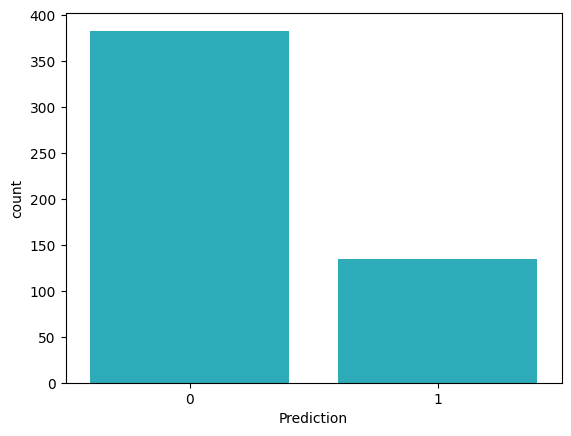

In [11]:
#Comparing the number of emails that are spam and not spam
sns.countplot(data=df, x='Prediction', color=sns.color_palette()[9])
plt.show();

Observation:
Proporsi email bukan spam (0) lebih besar dibandingkan dengan email spam (1)

##Split the data: training & testing

In [13]:
X = df.drop(columns='Prediction', axis=1)
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##Model Prediction

In [32]:
# It's important to choose the right metric when doing classification
df['Prediction'].value_counts()

0    383
1    135
Name: Prediction, dtype: int64

The class distribution is IMBALANCE, so need NOT to use accuracy. Use recall (sensitivity) instead!

In [20]:
# define the estimator/model
logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()
dtree_model = DecisionTreeClassifier()
svm_model = SVC()
NB_model = GaussianNB()
NN_model = MLPClassifier()

In [21]:
#Training the Logistic Regression Model
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
#Training for Another Model
knn_model.fit(X_train, y_train)
dtree_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
NB_model.fit(X_train, y_train)
NN_model.fit(X_train, y_train)

MLPClassifier()

In [23]:
#Evaluate the Model
logi_pred = logistic_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
dtree_pred = dtree_model.predict(X_test)
svmmodel_pred = svm_model.predict(X_test)
NB_model_pred = NB_model.predict(X_test)
NN_model_pred = NN_model.predict(X_test)

In [41]:
## print classification report
print("\033[1m" + "LOGISTIC REGRESSION : " + "\033[0m")
print(classification_report(logi_pred, y_test))

print("\033[1m" + "KNN : " + "\033[0m")
print(classification_report(knn_pred, y_test))

print("\033[1m" + "DECISION TREE : " + "\033[0m")
print(classification_report(dtree_pred, y_test))

print("\033[1m" + "SVM : " + "\033[0m")
print(classification_report(svmmodel_pred, y_test))

print("\033[1m" + "NAIVE BAYES : "  + "\033[0m")
print(classification_report(NB_model_pred, y_test))

print("\033[1m" + "NEURAL NETWORK : " + "\033[0m")
print(classification_report(NN_model_pred, y_test))

LOGISTIC REGRESSION : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.96      0.91      0.93        47

    accuracy                           0.96       156
   macro avg       0.96      0.95      0.95       156
weighted avg       0.96      0.96      0.96       156

KNN : 
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       119
           1       0.71      0.86      0.78        37

    accuracy                           0.88       156
   macro avg       0.83      0.88      0.85       156
weighted avg       0.90      0.88      0.89       156

DECISION TREE : 
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       121
           1       0.69      0.89      0.78        35

    accuracy                           0.88       156
   macro avg       0.83      0.89      0.85       156
weighted avg       0.90    

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Conclusion

Based on the model_performance result, the Logistic Regression model seems to be the best among all the models with highest accuracy, precision, recall, and f1_score. This suggests that the Logistic Regression model has the highest ability to correctly identify emails as spam or not spam, with minimal false positives and false negatives.